In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as smt
from scipy.stats import f_oneway

Things to Answer:

- Effectively Parking at UCSD, Best time to arrive to park 
- Busiest/Least busiest parking structure/parking area

In [3]:
# data extraction
data_summer = pd.read_excel("data/2022-2023_Summer.xlsx", "Summer 2022 Structures")
data_fall = pd.read_excel("data/2022-2023_Fall.xlsx", "Fall 2022 Structures")
data_winter = pd.read_excel("data/2022-2023_Winter.xlsx", "By Structure")
data_spring = pd.read_excel("data/2022-2023_Spring.xlsx", "ByStructurePivotTable")

In [4]:
def change_structure(df, start):
    start_index = df[df['Structure'] == start].index[0]
    end_index = df[df['Structure'] == str(start + " Total")].index[0]
    df.loc[start_index:end_index, 'Structure'] = df.loc[start_index:end_index, 'Structure'].fillna(start)

In [5]:
# summer
# getting the column name
index_column = data_summer.iloc[4, :].tolist()

# exclude the old header
data_summer = data_summer.iloc[5:, :]
data_summer.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_summer, "Athena")
change_structure(data_summer, "Campus Point East")
change_structure(data_summer, "Campus Point West")
change_structure(data_summer, "Gilman")
change_structure(data_summer, "Hopkins")
change_structure(data_summer, "Medical Center Hillcrest")
change_structure(data_summer, "Nuevo West/Vela")
change_structure(data_summer, "Pangea")
change_structure(data_summer, "Scholars")
change_structure(data_summer, "South Parking Structure")
change_structure(data_summer, "Torrey Pines Center North")
data_summer = data_summer.reset_index(drop=True)
# data_summer

In [6]:
# fall
# getting the column name

index_column = data_fall.iloc[4, :].tolist()

# exclude the old header
data_fall = data_fall.iloc[5:, :]
data_fall.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_fall, "Athena")
change_structure(data_fall, "Campus Point East")
change_structure(data_fall, "Campus Point West")
change_structure(data_fall, "Gilman")
change_structure(data_fall, "Hopkins")
change_structure(data_fall, "Medical Center Hillcrest")
change_structure(data_fall, "Nuevo West/Vela")
change_structure(data_fall, "Pangea")
change_structure(data_fall, "Scholars")
change_structure(data_fall, "South Parking Structure")
change_structure(data_fall, "Torrey Pines Center North")
data_fall = data_fall.reset_index(drop=True)
# data_fall

In [7]:
# winter
# getting the column name

index_column = data_winter.iloc[3, 1:].tolist()

# exclude the old header
data_winter = data_winter.iloc[4:, 1:]
data_winter.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_winter, "Arbor")
change_structure(data_winter, "Athena")
change_structure(data_winter, "Bachman")
change_structure(data_winter, "Campus Point East")
change_structure(data_winter, "Campus Point West")
change_structure(data_winter, "Gilman")
change_structure(data_winter, "Hopkins")
change_structure(data_winter, "Nuevo West/Vela")
change_structure(data_winter, "Pangea")
change_structure(data_winter, "Scholars")
change_structure(data_winter, "South")
change_structure(data_winter, "Torrey Pines Center North")
change_structure(data_winter, "Torrey Pines Center South")
data_winter = data_winter.reset_index(drop=True)
data_winter = data_winter.drop(columns="Space Subtype")
# data_winter

In [8]:
# spring
# getting the column name

index_column = data_spring.iloc[1, :].tolist()

# exclude the old header
data_spring = data_spring.iloc[2:, :]
data_spring.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_spring, "Arbor")
change_structure(data_spring, "Athena")
change_structure(data_spring, "Bachman")
change_structure(data_spring, "Campus Point East")
change_structure(data_spring, "Campus Point West")
change_structure(data_spring, "Gilman")
change_structure(data_spring, "Hopkins")
change_structure(data_spring, "Nuevo West/Vela")
change_structure(data_spring, "Pangea")
change_structure(data_spring, "Scholars")
change_structure(data_spring, "South")
change_structure(data_spring, "Torrey Pines Center North")
change_structure(data_spring, "Torrey Pines Center South")
data_spring = data_spring.reset_index(drop=True)
# data_spring

In [9]:
data_fall.loc[:, "quarter"] = "fall"
data_winter.loc[:, "quarter"] = "winter"
data_spring.loc[:, "quarter"] = "spring"
data_summer.loc[:, "quarter"] = "summer"

In [10]:
data_winter.columns = ['Structure', 'SpaceType', 'Sum of Inventory', 'Sum of 8am',
       'Sum of 9am', 'Sum of 10am', 'Sum of 11am', 'Sum of 12pm', 'Sum of 1pm',
       'Sum of 2pm', 'Sum of 3pm', 'Sum of 4pm', 'Sum of 5pm',
       'Min of EmptyCalc', 'Sum of OccupiedCalc', 'Sum of PercentCalc',
       'quarter']
data_spring.columns = ['Structure', 'SpaceType', 'Sum of Inventory', 'Sum of 8am',
       'Sum of 9am', 'Sum of 10am', 'Sum of 11am', 'Sum of 12pm', 'Sum of 1pm',
       'Sum of 2pm', 'Sum of 3pm', 'Sum of 4pm', 'Sum of 5pm',
       'Min of EmptyCalc', 'Sum of OccupiedCalc', 'Sum of PercentCalc',
       'quarter']

In [11]:
df = pd.concat([data_fall, data_winter, data_spring, data_summer])
# df

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Parking Structure

In [13]:
times = ['8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm']

grouped_structures = df.groupby('Structure').agg({**{'Sum of ' + time: 'sum' for time in times}, 'Sum of Inventory': 'sum'}).reset_index()

for time in times:
    vacancy_col = 'Sum of ' + time
    inventory_col = 'Sum of Inventory'
    rate_col = "Vacancy Rate at " + time

    grouped_structures[rate_col] = grouped_structures.apply(lambda row: row[vacancy_col] / row[inventory_col] if row[inventory_col] > 0 else 0, axis=1)

    grouped_structures[rate_col] = pd.to_numeric(grouped_structures[rate_col], errors='coerce')

grouped_structures = grouped_structures[~grouped_structures['Structure'].str.contains("Total")]

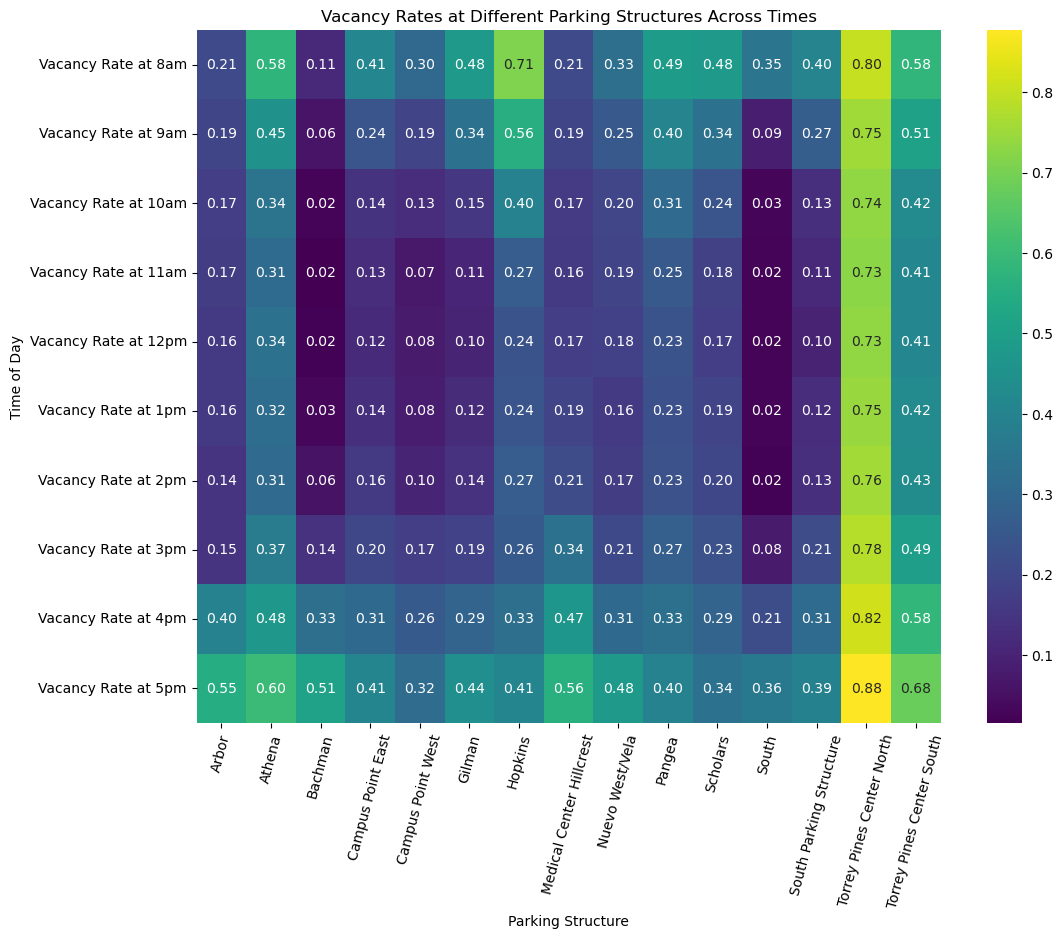

In [14]:
df_filtered = grouped_structures[grouped_structures['Structure'].notna() & (grouped_structures['Structure'] != '')]

#heatmap of parking vacancies across times vs. parking structures
times_rates = ['Vacancy Rate at 8am', 'Vacancy Rate at 9am', 'Vacancy Rate at 10am', 'Vacancy Rate at 11am', 'Vacancy Rate at 12pm', 'Vacancy Rate at 1pm', 'Vacancy Rate at 2pm', 'Vacancy Rate at 3pm', 'Vacancy Rate at 4pm', 'Vacancy Rate at 5pm']
times_sums = ['Sum of 8am','Sum of 9am','Sum of 10am','Sum of 11am','Sum of 12pm','Sum of 1pm','Sum of 2pm','Sum of 3pm','Sum of 4pm','Sum of 5pm']

vacancy_data_struct = df_filtered.groupby('Structure')[times_rates].mean().T

#alignment of parkign structure labels is off due to a matplotlib bug
plt.figure(figsize=(12, 9))
sns.heatmap(vacancy_data_struct, cmap="viridis", annot=True, fmt=".2f")
plt.title('Vacancy Rates at Different Parking Structures Across Times')
plt.xlabel('Parking Structure')
plt.ylabel('Time of Day')
plt.xticks(rotation=75)
plt.show()

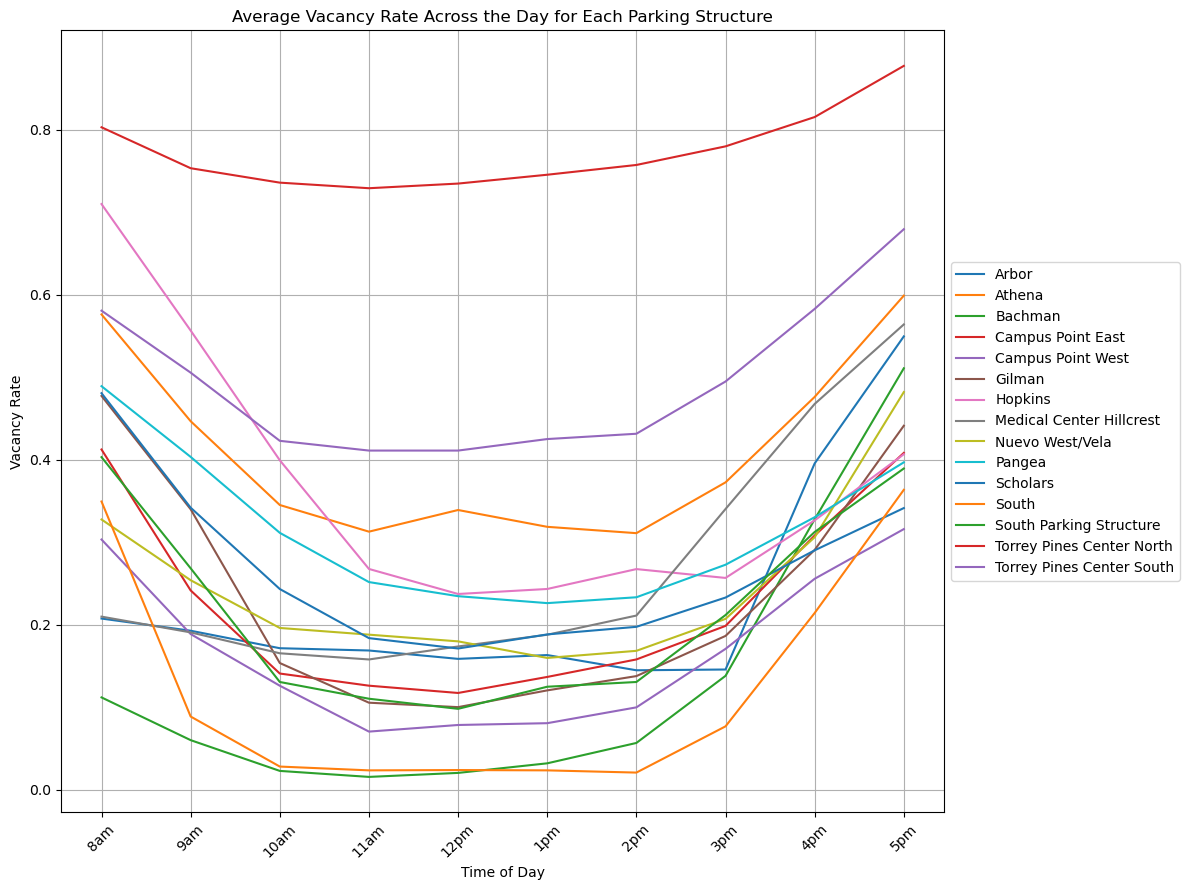

In [15]:
#linear graph of parking vacancy rates across times vs. parking structures
plt.figure(figsize=(12, 9))

for struct in grouped_structures['Structure'].unique():
    df_type2 = grouped_structures[grouped_structures['Structure'] == struct]

    vacancy_rates = df_type2[times_rates].mean()
    plt.plot(times, vacancy_rates, label=struct)

plt.title('Average Vacancy Rate Across the Day for Each Parking Structure')
plt.xlabel('Time of Day')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

# df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

# df_valid = df_filtered[df_filtered['Vacancy Rate at 8am'].notnull()]

# # Plotting the boxplot for occupancy rates at 8 am across structures
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='inferno', hue = "Structure")
# plt.title('Vacancy Rates Across Structures at 8 AM')
# plt.xlabel('Parking Structure')
# plt.ylabel('Vacancy Rate')
# plt.xticks(rotation=75)
# plt.show()

Observation:
- Torrey Pines Center North seems like the least busiest parking structure, overall.

**Question: Is the mean vacancy rate at Torrey Pines Center North significantly lower than the mean vacancy rate at any other parking structure?** 

Test: Multiple One-sided T-Tests

- Null Hypothesis ($H_0$): The mean vacancy rate is the same across all parking structures.

- Alternate Hypothesis ($H_a$): The mean vacancy rate at Torrey Pines Center North is significantly lower than the mean vacancy rate at any other parking structure.

In [17]:
structures = ['Arbor', 'Athena', 'Bachman', 'Campus Point East', 'Campus Point West', 'Gilman', 'Hopkins', 'Medical Center Hillcrest', 'Nuevo West/Vela', 'Pangea', 'Scholars', 'South', 'South Parking Structure', 'Torrey Pines Center North', 'Torrey Pines Center South']
reference_structure = 'Torrey Pines Center North'

# perform one-sided t-tests for each structure
p_values = {}
for structure in structures:
    if structure != reference_structure:
        _, p_value = ttest_ind(vacancy_data_struct[structure], vacancy_data_struct[reference_structure], alternative='less')
        p_values[structure] = p_value

# p-values onto a dataframe for visual
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Parking Structure', 'P-value'])
p_values_df

,Parking Structure,P-value
0,Arbor,2.286198e-10
1,Athena,7.422874e-09
2,Bachman,2.684272e-10
3,Campus Point East,1.923767e-11
4,Campus Point West,2.541383e-13
5,Gilman,6.054312e-10
6,Hopkins,1.646281e-07
7,Medical Center Hillcrest,1.656501e-09
8,Nuevo West/Vela,6.569444e-12
9,Pangea,1.344290e-11


Because this is a multiple test hypothesis, there is a higher chance for a large False Discovery Rate (FDR). We decided to use the Benjamini–Hochberg Procedure as the a multiple testing correction method to control the FDR by adjusting our $\alpha = 0.05$ threshold for rejection for each comparison: 

In [18]:
# apply Benjamini–Hochberg Procedure
rejected, p_values_corrected, _, _ = smt.multipletests(p_values_df['P-value'], alpha=0.05, method='fdr_bh')

The corrected p-values (Corrected P-value column) are the p-values adjusted using the Benjamini–Hochberg Procedure. They take into account the multiple comparisons, reducing the chance of making a Type I error (false positive).


In [19]:
# add corrected p-values to the DataFrame
p_values_df['Corrected P-value'] = p_values_corrected
p_values_df['Rejected'] = rejected

p_values_df

,Parking Structure,P-value,Corrected P-value,Rejected
0,Arbor,2.286198e-10,4.000847e-10,True
1,Athena,7.422874e-09,8.660020e-09,True
2,Bachman,2.684272e-10,4.175534e-10,True
3,Campus Point East,1.923767e-11,4.488789e-11,True
4,Campus Point West,2.541383e-13,3.557936e-12,True
5,Gilman,6.054312e-10,8.476037e-10,True
6,Hopkins,1.646281e-07,1.646281e-07,True
7,Medical Center Hillcrest,1.656501e-09,2.108274e-09,True
8,Nuevo West/Vela,6.569444e-12,4.002296e-11,True
9,Pangea,1.344290e-11,4.479516e-11,True


Conclusion: 
For all parking structures, the null hypothesis was rejected. This means that the mean vacancy rate at Torrey Pines Center North is significantly lower than the mean vacancy rate at each of these structures.

Torrey Pines Center North generally has lower demand or higher availability compared to others meaning it is probably the least busy parking structure!

# Parking Spot

In [20]:
grouped_spots = df.groupby('SpaceType').agg({**{'Sum of ' + time: 'sum' for time in times}, 'Sum of Inventory': 'sum'}).reset_index()

# Then calculate the occupancy rate for each structure and time
for time in times:
    vacancy_col = 'Sum of ' + time
    inventory_col = 'Sum of Inventory'
    rate_col = "Vacancy Rate at " + time

    # Calculate occupancy rate
    grouped_spots[rate_col] = grouped_spots.apply(lambda row: row[vacancy_col] / row[inventory_col] if row[inventory_col] > 0 else 0, axis=1)

    # Convert to numeric, coerce errors to NaN (which you can then fill or handle as you wish)
    grouped_spots[rate_col] = pd.to_numeric(grouped_spots[rate_col], errors='coerce')

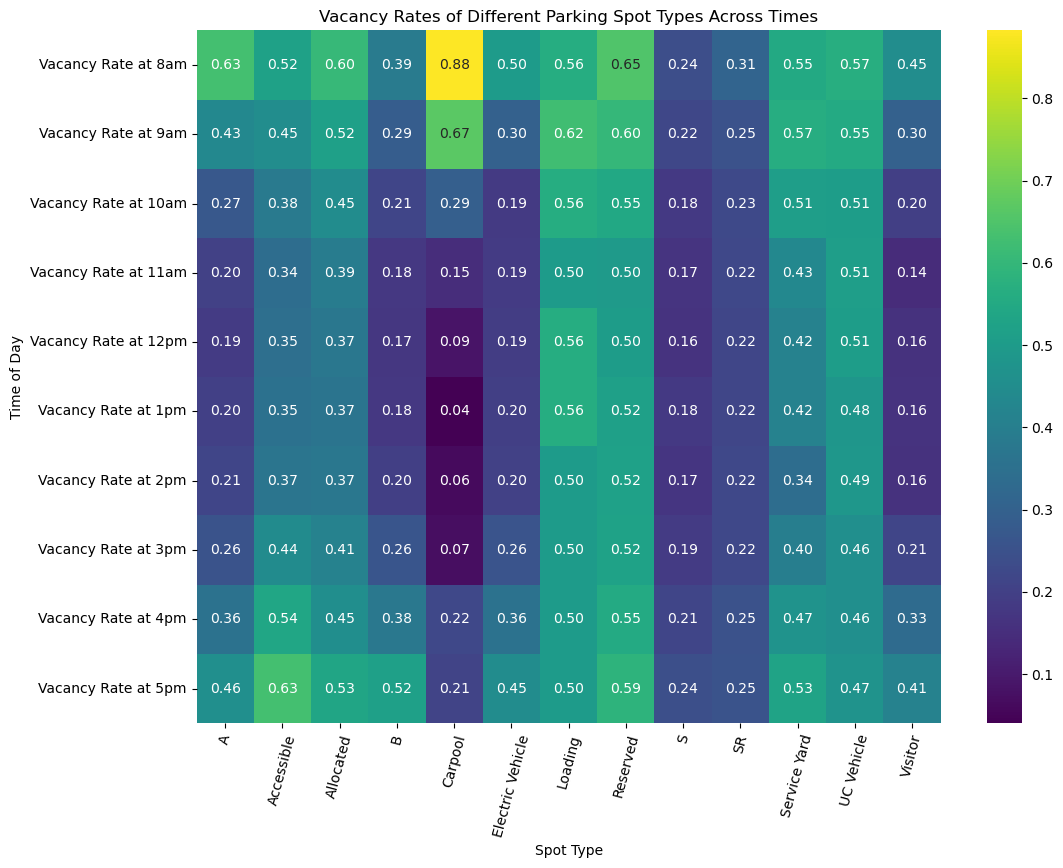

In [21]:
#heatmap of parking vacancies across times vs. space types
df_filtered_2 = grouped_spots[grouped_spots['SpaceType'].notna() & (grouped_spots['SpaceType'] != '')]

vacancy_data_space = df_filtered_2.groupby('SpaceType')[times_rates].mean().T

#alignment of parkign structure labels is off due to a matplotlib bug
plt.figure(figsize=(12, 9))
sns.heatmap(vacancy_data_space, cmap="viridis", annot=True, fmt=".2f")
plt.title('Vacancy Rates of Different Parking Spot Types Across Times')
plt.xlabel('Spot Type')
plt.ylabel('Time of Day')
plt.xticks(rotation=75)
plt.show()

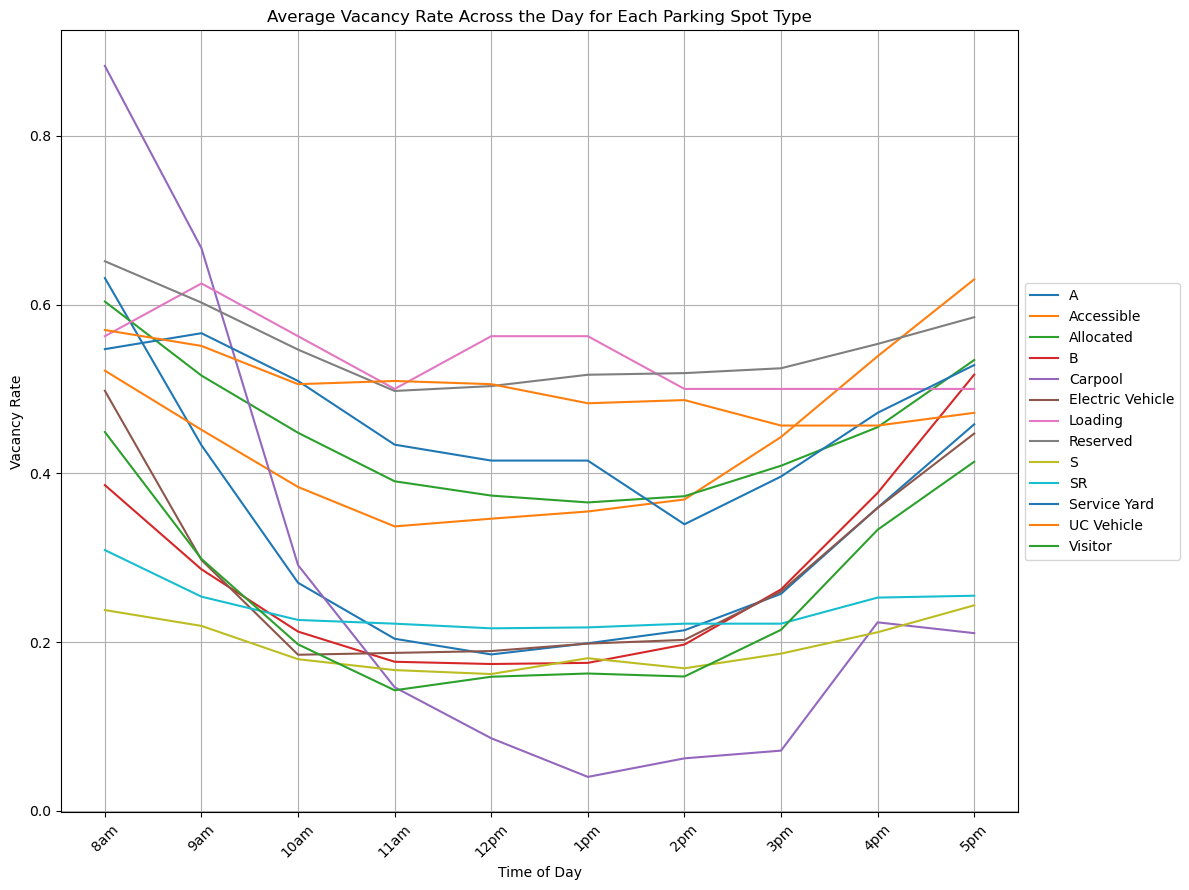

In [22]:
#linear graph of parking vacancy rates across times vs. parking structures
plt.figure(figsize=(12, 9))

for struct in grouped_spots['SpaceType'].unique():
    df_type2 = grouped_spots[grouped_spots['SpaceType'] == struct]

    vacancy_rates = df_type2[times_rates].mean()
    plt.plot(times, vacancy_rates, label=struct)

plt.title('Average Vacancy Rate Across the Day for Each Parking Spot Type')
plt.xlabel('Time of Day')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Observations:
- From all the spot types allowed for students, so A,B,S,SR, and Visitor, it seems like all spots are equally occupied.  

**Question: Is there significant evidence to suggest that among the parking spot types allowed for students (A, B, S, SR, and Visitor), at least one spot type is busier or less busy than the others, or are they all equally busy?**

Test: ANOVA test

- Null Hypothesis($H_0$): All spot types are equally busy. 
- Alternate Hypothesis ($H_a$): At least one spot type among A, B, S, SR, and Visitor is busier or less busy than the others.

In [23]:
vacancy_data_space_transposed = vacancy_data_space.transpose()
student_spot_types = ['A', 'B', 'S', 'SR', 'Visitor']
data_student = vacancy_data_space_transposed.loc[student_spot_types].values

# perform ANOVA test
statistic, p_value = f_oneway(*data_student)

# significance (using a significance level of 0.05)
if p_value < 0.05:
    print('Reject the null hypothesis. There are significant differences among student spot types.')
else:
    print('Fail to reject the null hypothesis. There are no significant differences among student spot types.')

Fail to reject the null hypothesis. There are no significant differences among student spot types.


Based on the analysis of the vacancy rates based on spots, there is no significant evidence to suggest differences in occupancy among the parking spot types allowed for students. Since we do not have enough evidence to conclude that at least one spot type is busier or less busy than the others, we fail to reject the null hypothesis that all spot types are equally busy.

# Time 

/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_44361/412061287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vacancy Rate at 5pm'] = df_filtered.apply(lambda row: row['Sum of 5pm'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)
/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_44361/412061287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Structure', y='Vacancy Rate at 5pm', data=df_valid, palette='Spectral')


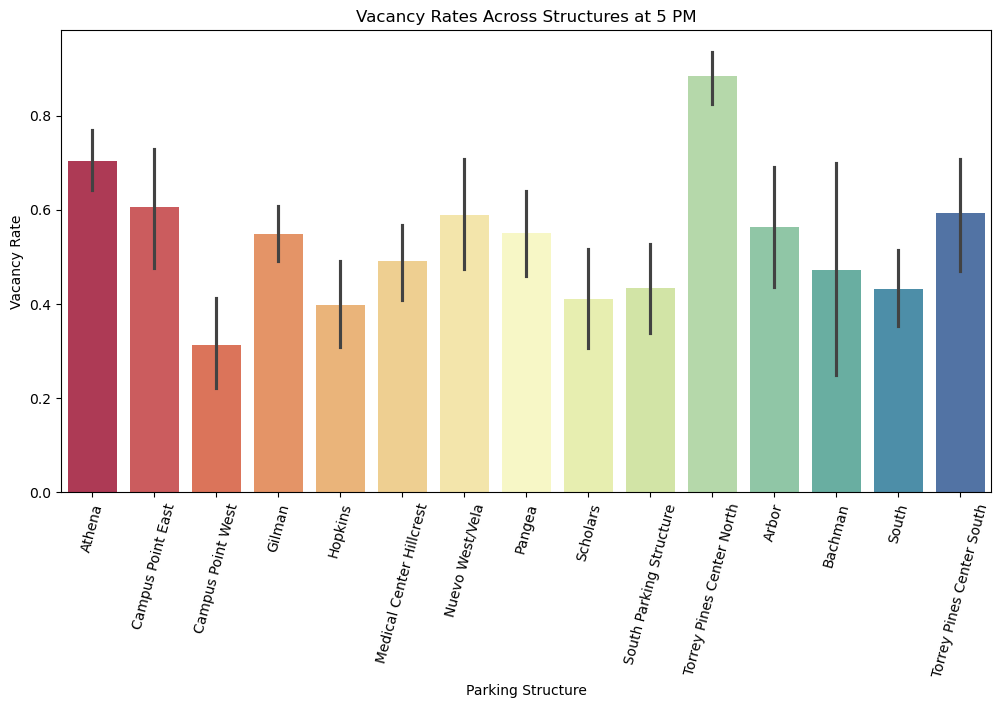

In [24]:
df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

df_filtered['Vacancy Rate at 5pm'] = df_filtered.apply(lambda row: row['Sum of 5pm'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

df_valid = df_filtered[df_filtered['Vacancy Rate at 5pm'].notnull()]

plt.figure(figsize=(12, 6))
sns.barplot(x='Structure', y='Vacancy Rate at 5pm', data=df_valid, palette='Spectral')
plt.title('Vacancy Rates Across Structures at 5 PM')
plt.xlabel('Parking Structure')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=75)
plt.show()

/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_44361/3744956108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)
/var/folders/r7/ygyqxmmx47v_vpxrnbhmp4h00000gn/T/ipykernel_44361/3744956108.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='Spectral')


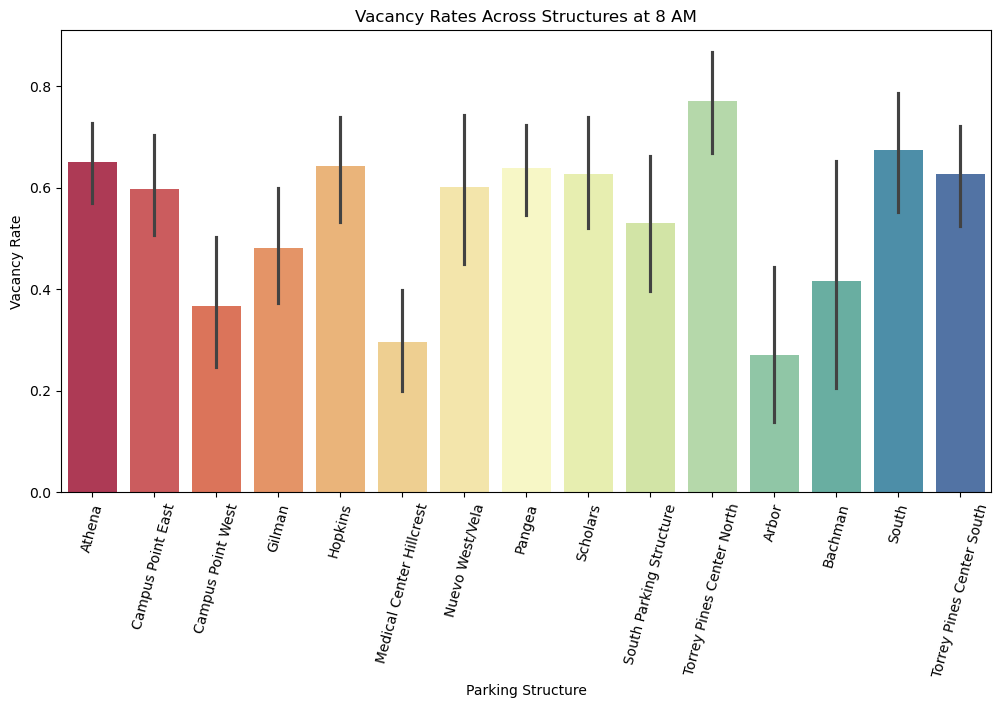

In [25]:
df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

df_valid = df_filtered[df_filtered['Vacancy Rate at 8am'].notnull()]

plt.figure(figsize=(12, 6))
sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='Spectral')
plt.title('Vacancy Rates Across Structures at 8 AM')
plt.xlabel('Parking Structure')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=75)
plt.show()


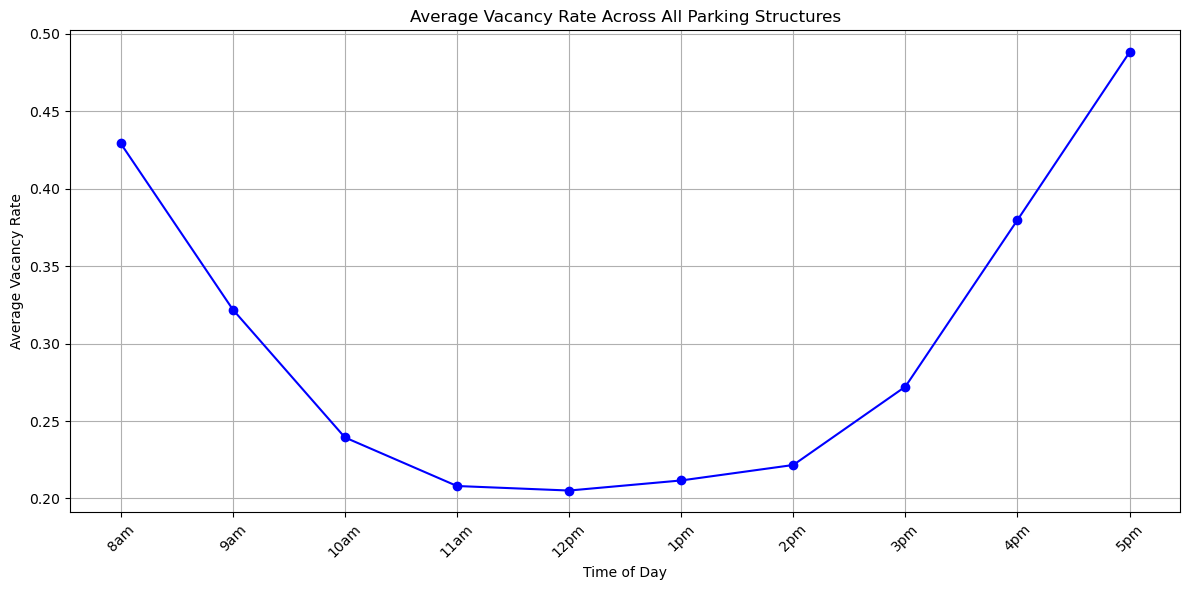

In [26]:
times = ['8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm']
times_rates = ['Vacancy Rate at ' + time for time in times]

# Calculate the mean vacancy rate across all structures for each time
mean_vacancy_rates = vacancy_data_struct.transpose()[times_rates].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(times, mean_vacancy_rates, marker='o', linestyle='-', color='b')

plt.title('Average Vacancy Rate Across All Parking Structures')
plt.xlabel('Time of Day')
plt.ylabel('Average Vacancy Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Observations: 
- 5pm seem like the best time to park because of the high vacancy rate.

Question: Are there specific time frames where the vacancy rates significantly differ from the vacancy rate at 5 pm?

Null Hypothesis ($H_0$): There is no significant difference in the mean vacancy rates between the given time frame and 5 pm.

Alternative Hypothesis ($H_a$): The mean vacancy rate at the given time frame is significantly higher than the mean vacancy rate at 5 pm.

In [27]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your data is stored in a DataFrame called 'vacancy_data_struct'
# Transpose the DataFrame for easier processing
vacancy_data_struct_transposed = vacancy_data_struct

# Identify the time frame with the minimum mean vacancy rate
least_busy_time_frame = 'Vacancy Rate at 5pm'

# Extract relevant information
time_frames = vacancy_data_struct_transposed.index
data = vacancy_data_struct_transposed.values

# Perform t-tests for each time frame compared to the least busy time frame
p_values = {}
for time_frame in time_frames:
    if time_frame != least_busy_time_frame:
        _, p_value = ttest_ind(data[time_frames == time_frame][0], data[time_frames == least_busy_time_frame][0], alternative='less')
        p_values[time_frame] = p_value

# Convert p-values to a DataFrame for better presentation
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Time Frame', 'P-value'])

# Apply Benjamini–Hochberg Procedure
rejected, p_values_corrected, _, _ = smt.multipletests(p_values_df['P-value'], alpha=0.05, method='fdr_bh')

# Add corrected p-values and rejection status to the DataFrame
p_values_df['Corrected P-value'] = p_values_corrected
p_values_df['Rejected'] = rejected

# Print the results
p_values_df


,Time Frame,P-value,Corrected P-value,Rejected
0,Vacancy Rate at 8am,0.176029,0.176029,False
1,Vacancy Rate at 9am,0.005841,0.007509,True
2,Vacancy Rate at 10am,0.000166,0.000298,True
3,Vacancy Rate at 11am,0.000036,0.000131,True
4,Vacancy Rate at 12pm,0.000034,0.000131,True
5,Vacancy Rate at 1pm,0.000044,0.000131,True
6,Vacancy Rate at 2pm,0.000067,0.000150,True
7,Vacancy Rate at 3pm,0.000539,0.000808,True
8,Vacancy Rate at 4pm,0.029866,0.033599,True


Since the corrected p-value for 8 am is greater than 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in the mean vacancy rates between the vacancy rate at 8 am and the vacancy rate at 5 pm.

However, based on the rejection of the null hypothesis for time frames 9 am to 4 pm, we can infer that the mean vacancy rates at these time frames are significantly lower than for the vacancy rate for 5 pm. 

Observations:

1. the last 2 bar charts are the exact same as the first 2, was that a mistake, am I msising something, were they supposed to be for parking spot types instead of structures?
2. From all the spot types allowed for students, so A,B,S,SR, and Visitor, all are equally occupied and since this is the case(nothing super interesting), should we consider adding a graph on number of A,B,S,SR,Visitor spots instead of the vacancy rates of those so we can have observations and conclusions like 'UCSD should add more SR spots as it is clear they have significantly more B spots than SR when it is evident that there are more undergrads than grads'
3. For all the graphs regarding spot types i.e. the line grid, can we just show the core ones that students park in so A,B,S,SR, and Visitor (I think?) because right now the line grid seems too convoluted with unneccessary spots like UC vehicle making it harder to see trends about the ones we care.
4. So the only real observation and test we are ready to do right away is Null Hypothesis: All parking structures are equally busy. Alternate: Torrey Pines Center North is the least busiest parking strucure, using the method Esther outlined the TA suggesting on discord. The question is do we want to run that test for every time of the day or just 1 test.

<Figure size 1400x800 with 0 Axes>

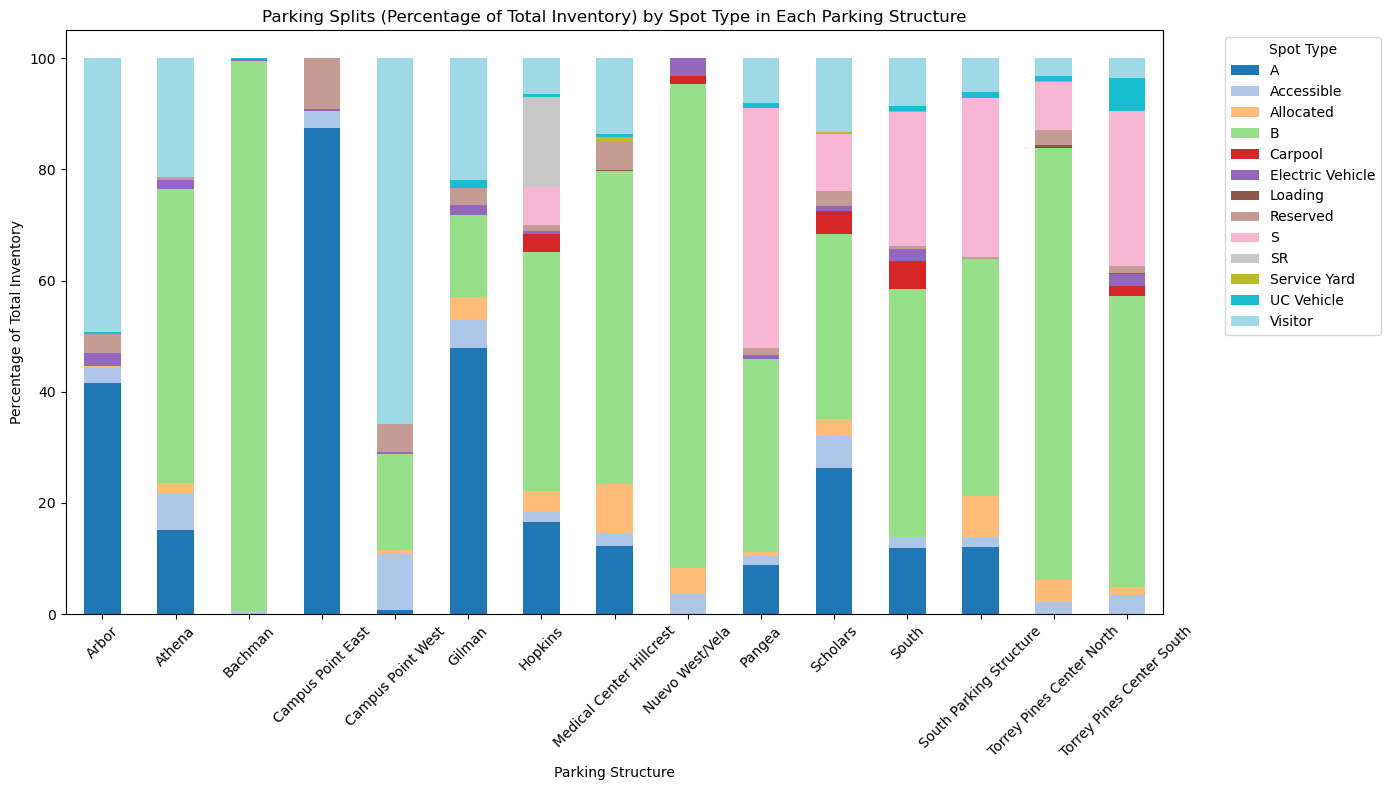

In [30]:
#graph of parking splits of different spots across different parking structures

# aggregate  data by structure and SpaceType
df_agg = df.groupby(['Structure', 'SpaceType'])['Sum of Inventory'].sum().reset_index()

# calculate the total inventory per structure
total_inventory_by_structure = df_agg.groupby('Structure')['Sum of Inventory'].sum().reset_index().rename(columns={'Sum of Inventory': 'Total Inventory'})

# merge to get the total inventory per structure + each spot's inventory
df_agg = df_agg.merge(total_inventory_by_structure, on='Structure')

# Calculating the percentage of total inventory for each spot type within each structure
df_agg['Percentage of Total'] = (df_agg['Sum of Inventory'] / df_agg['Total Inventory']) * 100

plot_data_real = df_agg.pivot(index='Structure', columns='SpaceType', values='Percentage of Total')
plt.figure(figsize=(14, 8))
plot_data_real.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Parking Splits (Percentage of Total Inventory) by Spot Type in Each Parking Structure')
plt.xlabel('Parking Structure')
plt.ylabel('Percentage of Total Inventory')
plt.legend(title='Spot Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
